In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

\begin{equation}
\chi_\mu(\mathbf{r}) = N_{\alpha_\mu} e^{-\alpha_\mu r^2}
\end{equation}

From the normalization condition ($\langle \chi_\mu | \chi_\mu \rangle = 1$) it follows that
\begin{equation}
N_{\alpha_\mu} = 
\left(\frac{2\alpha_\mu}{\pi}\right)^{3/4}
\end{equation}

In [87]:
def Basis(x,y,z,a):
    return (2 * a / math.pi) ** (3/4) * np.exp(-a * (x**2 + y**2 + z**2))

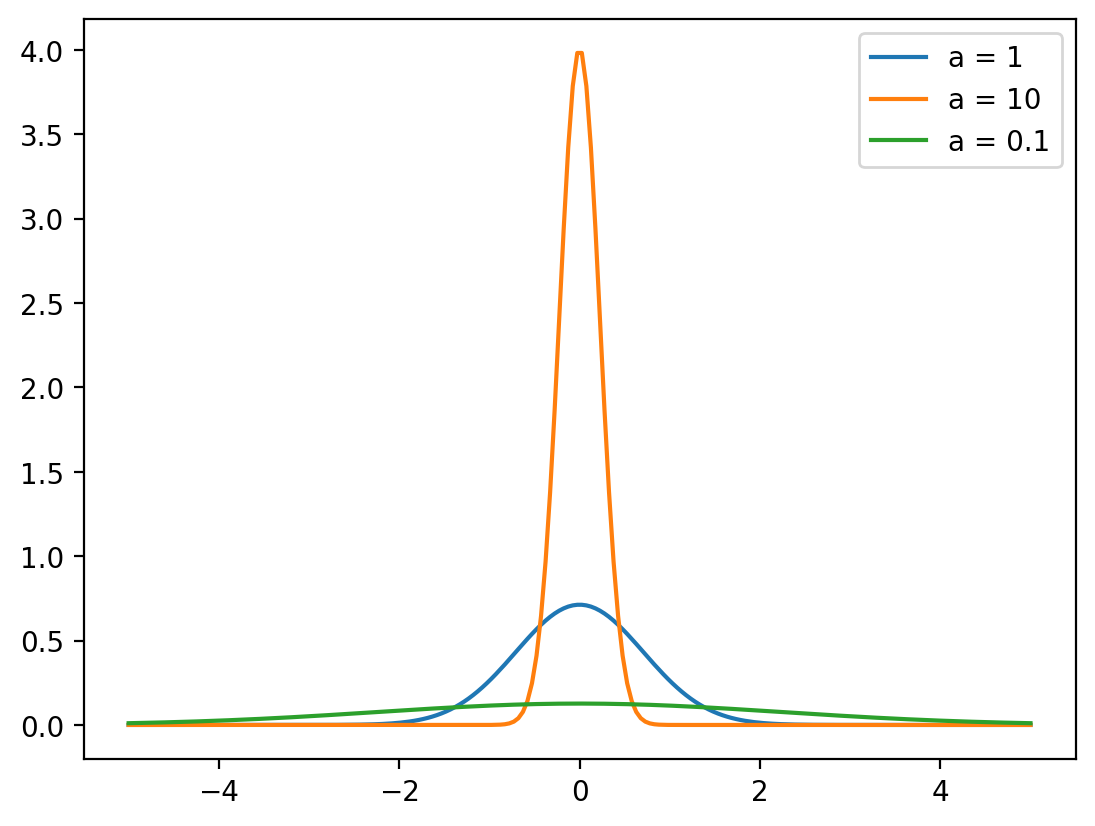

In [285]:
x = np.linspace(-5, 5, 200)
plt.plot(x, Basis(x,0,0,1), label='a = 1')
plt.plot(x, Basis(x,0,0,10), label='a = 10')
plt.plot(x, Basis(x,0,0,0.1), label='a = 0.1')
plt.legend()

## Overlap integral
\begin{align}
\langle \chi_\mu | \chi_\nu \rangle
= (\alpha_\mu \alpha_\nu)^{3/4} \left( \frac{2}{\alpha_\mu + \alpha_\nu}\right)^{3/2}
\end{align}

In [98]:
def S(a1,a2):
    return (a1 * a2) ** (3/4) * (2 / (a1 + a2)) ** (3/2)

In [99]:
S(1.,1.)

1.0

In [100]:
# test a matrix element
assert math.isclose(S(3.,2.),0.9698474422447792)

## Kinetic energy integral

\begin{align}
\langle \chi_\mu | \hat{T} | \chi_\nu \rangle 
= 6 \sqrt{2}  \frac{ (\alpha_\mu \alpha_\nu)^{7/4}}{(\alpha_\mu + \alpha_\nu)^{5/2}}
\end{align}

In [101]:
def T(a1,a2):
    return 6. * math.sqrt(2) * (a1 * a2) ** (7/4) / ((a1 + a2) ** (5/2))

In [102]:
T(1.,1.)

1.5

In [103]:
# test a matrix element
assert math.isclose(T(3.,2.),3.491450792081205)

## Potential energy integral

\begin{equation}
\langle \chi_\mu | \hat{V} | \chi_\nu \rangle = -4 \sqrt{\frac{2}{\pi}}  \frac{(\alpha_\mu \alpha_\nu)^{3/4} }{\alpha_\mu + \alpha_\nu}
\end{equation}

In [104]:
def V(a1,a2):
    return -4. * math.sqrt(2 / math.pi) * (a1 * a2) ** (3/4) / (a1 + a2)

In [105]:
V(1.,1.)

-1.5957691216057308

In [106]:
# test a matrix element
assert math.isclose(V(3.,2.),-2.447053622925871)

## Total energy (kinetic + potential) for one basis function

\begin{align}
\langle \chi_\mu | \hat{T} | \chi_\mu \rangle + \langle \chi_\mu | \hat{V} | \chi_\mu \rangle
= \frac{3}{2} \alpha_\mu  -2 \sqrt{\frac{2 \alpha_\mu }{\pi}}
\end{align}

In [107]:
def Hdiag(a):
    return T(a,a) + V(a,a)

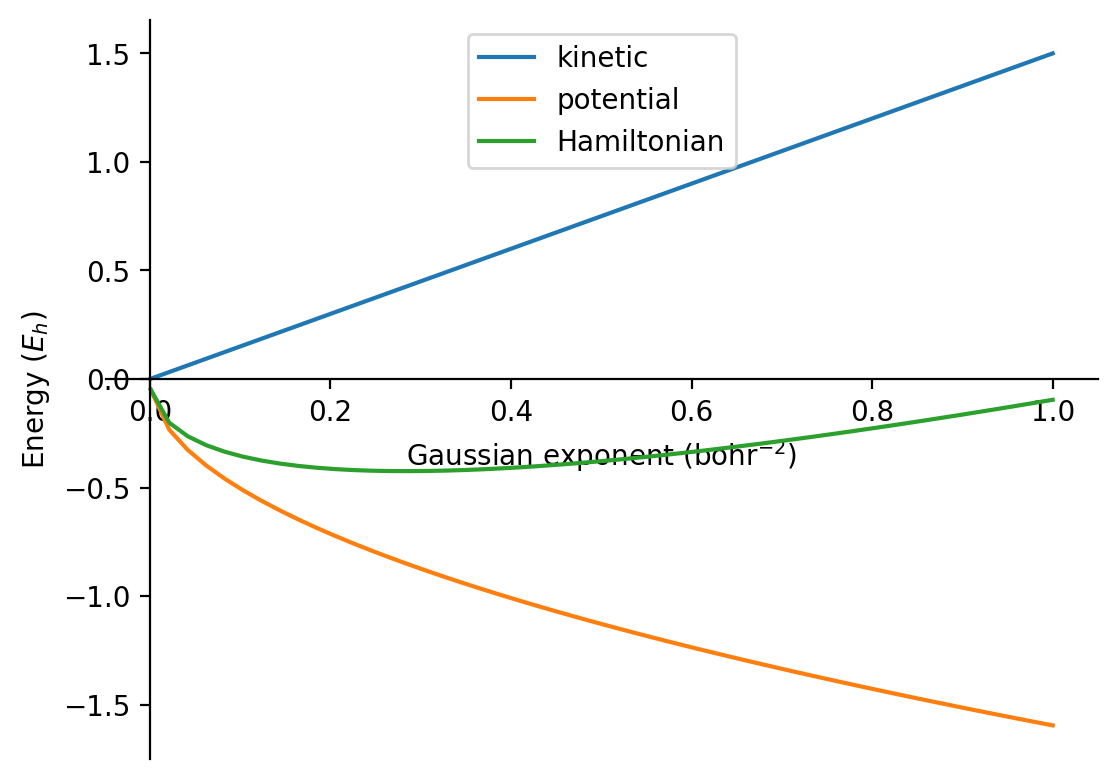

In [280]:
avals = np.linspace(0.001, 1, 50)

fig, ax = plt.subplots()
ax.plot(avals, T(avals,avals), label='kinetic')
ax.plot(avals, V(avals,avals), label='potential')
ax.plot(avals, Hdiag(avals), label='Hamiltonian')

# Adjust spines
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
ax.set_xlabel('Gaussian exponent (bohr$^{-2}$)')
ax.set_ylabel('Energy ($E_h$)')
ax.legend(loc='upper center')
plt.show()

In [281]:
import numpy as np
import scipy

In [282]:
basis = [1000. * 0.3 ** i for i in range(12)]
def build_matrices(basis):
    n = len(basis)
    H = np.ndarray((n,n))
    M = np.ndarray((n,n))
    for m, a1 in enumerate(basis):
        for n, a2 in enumerate(basis):
            H[m,n] = T(a1,a2) + V(a1,a2)
            M[m,n] = S(a1,a2)
    return H, M

In [253]:
H,M = build_matrices(basis)

In [254]:
evals, evecs = scipy.linalg.eigh(H,M)

In [255]:
evals

array([-4.99945151e-01, -1.24838045e-01, -5.54298552e-02, -3.10432309e-02,
        6.05579338e-02,  8.49058151e-01,  4.33022284e+00,  1.73325844e+01,
        6.31760359e+01,  2.20977505e+02,  7.64472477e+02,  2.73444241e+03])

In [267]:
evecs
c = -evecs[:,0]
c

array([ 7.01628363e-05,  1.87439139e-04,  1.00608232e-03,  4.24257581e-03,
        1.93495642e-02,  7.89719708e-02,  2.86957233e-01,  5.60289777e-01,
        2.09756543e-01, -2.28550886e-02,  9.83008063e-03, -2.98153528e-03])

In [268]:
def Psi(x,basis,c):
    val = 0.
    for a, c_a in zip(basis,c):
        val += c_a * Basis(x,0,0,a)
    return val

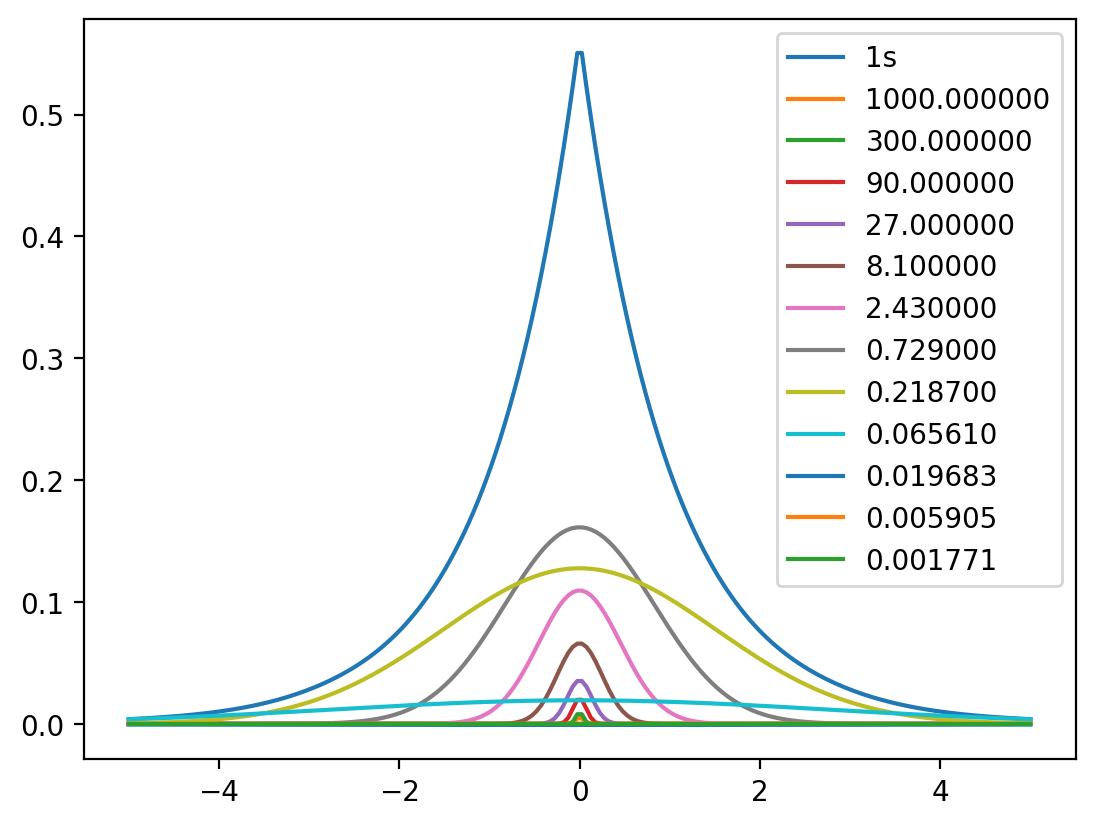

In [286]:
plt.plot(x, Psi(x,basis,c),label='1s')
for a, c_a in zip(basis,c):
    plt.plot(x, c_a * Basis(x,0,0,a),label=f'{a:f}')    
plt.legend()